In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("movie.csv")
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [27]:
df.loc[df.duplicated()]

,text,label
2164,"I find it rather useless to comment on this ""m...",0
3236,An absolutely atrocious adaptation of the wond...,0
3428,When I first saw this film it was not an impre...,0
3652,Before I watched this tv movie I did not know ...,1
3787,What a clunker!<br /><br />It MUST have been m...,0
...,...,...
39229,I Enjoyed Watching This Well Acted Movie Very ...,1
39246,You do realize that you've been watching the E...,0
39508,(Spoilers)<br /><br />Oh sure it's based on Mo...,0
39681,It's been a long time since I last saw a movie...,0


In [28]:
df = df.loc[~df.duplicated()].reset_index(drop=True)
df.head()
#removing duplicate entries

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [29]:
df['label'].value_counts()
#we can see that the label only consists of entries 0 and 1, and the data is really well-distributed

,count
label,
1,19908
0,19815


In [30]:
df.isna().sum()
#hence, no missing data

,0
text,0
label,0


<Axes: xlabel='label', ylabel='review_length'>

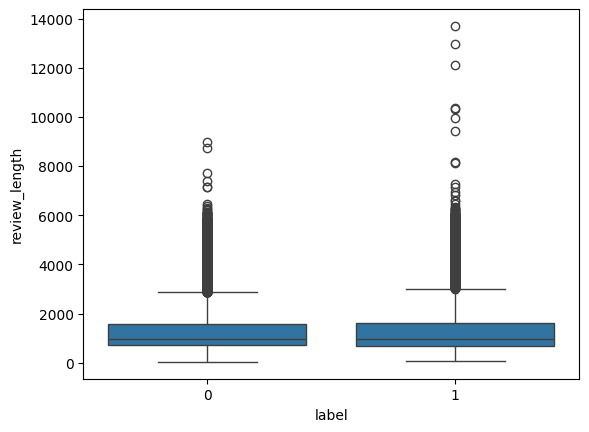

In [31]:
df['review_length'] = df['text'].str.len()

sns.boxplot(x='label', y='review_length', data=df)

In [32]:
df['text'] = df['text'].str.lower()
df #lowercase

,text,label,review_length
0,i grew up (b. 1965) watching and loving the th...,0,874
1,"when i put this movie in my dvd player, and sa...",0,1811
2,why do people who do not know what a particula...,0,983
3,even though i have great interest in biblical ...,0,351
4,im a die hard dads army fan and nothing will e...,1,983
...,...,...,...
39718,"""western union"" is something of a forgotten cl...",1,3111
39719,this movie is an incredible piece of work. it ...,1,291
39720,my wife and i watched this movie because we pl...,0,1092
39721,"when i first watched flatliners, i was amazed....",1,1045


In [33]:
import re
import nltk
nltk.download("all")
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

In [34]:
def preprocess(text):
    text = text.lower()  # lowercasing
    text = re.sub(r'[^\w\s]', '', text)  # removing punctuation
    tokens = word_tokenize(text)  # tokenizing
    tokens = [w for w in tokens if w not in stop_words]  # removing stopwords
    tokens = [lemmatizer.lemmatize(w) for w in tokens]  # lemmatizing
    return ' '.join(tokens)

In [36]:
df['cleaned_text'] = df['text'].apply(preprocess)

In [37]:
df

,text,label,review_length,cleaned_text
0,i grew up (b. 1965) watching and loving the th...,0,874,grew b 1965 watching loving thunderbird mate s...
1,"when i put this movie in my dvd player, and sa...",0,1811,put movie dvd player sat coke chip expectation...
2,why do people who do not know what a particula...,0,983,people know particular time past like feel nee...
3,even though i have great interest in biblical ...,0,351,even though great interest biblical movie bore...
4,im a die hard dads army fan and nothing will e...,1,983,im die hard dad army fan nothing ever change g...
...,...,...,...,...
39718,"""western union"" is something of a forgotten cl...",1,3111,western union something forgotten classic west...
39719,this movie is an incredible piece of work. it ...,1,291,movie incredible piece work explores every noo...
39720,my wife and i watched this movie because we pl...,0,1092,wife watched movie plan visit sicily stromboli...
39721,"when i first watched flatliners, i was amazed....",1,1045,first watched flatliners amazed necessary feat...


In [38]:
from sklearn.model_selection import train_test_split

X = df['cleaned_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
#creating test-train split

In [39]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

onehot = CountVectorizer(binary=True)
X_train_onehot = onehot.fit_transform(X_train)
X_test_onehot = onehot.transform(X_test)

In [40]:
bow = CountVectorizer()
X_train_bow = bow.fit_transform(X_train)
X_test_bow = bow.transform(X_test)

In [41]:
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [42]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [43]:
#Evaluating

def evaluate(model, Xte, name):
    preds = model.predict(Xte)
    probs = model.predict_proba(Xte)[:, 1]

    print(name)
    print("Accuracy: ", accuracy_score(y_test, preds))
    print("F1 Score: ", f1_score(y_test, preds))
    print("ROC AUC: ", roc_auc_score(y_test, probs) )
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print("-" * 50)

In [44]:
logistic = LogisticRegression()

# one-hot
logistic.fit(X_train_onehot, y_train)
evaluate(logistic, X_test_onehot, "Logistic Regression (One-Hot)")

# bow
logistic.fit(X_train_bow, y_train)
evaluate(logistic, X_test_bow, "Logistic Regression (BoW)")

# TF-IDF
logistic.fit(X_train_tfidf, y_train)
evaluate(logistic, X_test_tfidf, "Logistic Regression (TF-IDF)")

Logistic Regression (One-Hot)
Accuracy:  0.8830711139081183
F1 Score:  0.8842656035878909
ROC AUC:  0.9502448122278235
Confusion Matrix:
 [[3467  496]
 [ 433 3549]]
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression (BoW)
Accuracy:  0.8826935179358086
F1 Score:  0.8843672456575682
ROC AUC:  0.9482821574197186
Confusion Matrix:
 [[3449  514]
 [ 418 3564]]
--------------------------------------------------
Logistic Regression (TF-IDF)
Accuracy:  0.8839521711768408
F1 Score:  0.8859475507174666
ROC AUC:  0.954150097340632
Confusion Matrix:
 [[3442  521]
 [ 401 3581]]
--------------------------------------------------


In [45]:
bnb = BernoulliNB()        #I have used bernoulli naive bayes as it is more suitable for binary text classification (presence or absence of certain words)

# one-hot
bnb.fit(X_train_onehot, y_train)
evaluate(bnb, X_test_onehot, "BernoulliNB (One-Hot)")

# bow
bnb.fit(X_train_bow, y_train)
evaluate(bnb, X_test_bow, "BernoulliNB (BoW)")

# TF-IDF
bnb.fit(X_train_tfidf, y_train)
evaluate(bnb, X_test_tfidf, "BernoulliNB (TF-IDF)")


BernoulliNB (One-Hot)
Accuracy:  0.8431718061674008
F1 Score:  0.8373792743409032
ROC AUC:  0.9217398048979684
Confusion Matrix:
 [[3491  472]
 [ 774 3208]]
--------------------------------------------------
BernoulliNB (BoW)
Accuracy:  0.8431718061674008
F1 Score:  0.8373792743409032
ROC AUC:  0.9217398048979684
Confusion Matrix:
 [[3491  472]
 [ 774 3208]]
--------------------------------------------------
BernoulliNB (TF-IDF)
Accuracy:  0.8421648835745752
F1 Score:  0.8417865253595761
ROC AUC:  0.91813422196503
Confusion Matrix:
 [[3355  608]
 [ 646 3336]]
--------------------------------------------------


In [46]:
rf = RandomForestClassifier()

# one-hot
rf.fit(X_train_onehot, y_train)
evaluate(rf, X_test_onehot, "Random Forest (One-Hot)")

# bow
rf.fit(X_train_bow, y_train)
evaluate(rf, X_test_bow, "Random Forest (BoW)")

# TF-IDF
rf.fit(X_train_tfidf, y_train)
evaluate(rf, X_test_tfidf, "Random Forest (TF-IDF)")


Random Forest (One-Hot)
Accuracy:  0.8512271869100063
F1 Score:  0.8515448379804069
ROC AUC:  0.9269783353883797
Confusion Matrix:
 [[3373  590]
 [ 592 3390]]
--------------------------------------------------
Random Forest (BoW)
Accuracy:  0.8541220893643802
F1 Score:  0.8550343964978111
ROC AUC:  0.9289190646326333
Confusion Matrix:
 [[3368  595]
 [ 564 3418]]
--------------------------------------------------
Random Forest (TF-IDF)
Accuracy:  0.8419131529263688
F1 Score:  0.8414541782378188
ROC AUC:  0.919897835744068
Confusion Matrix:
 [[3356  607]
 [ 649 3333]]
--------------------------------------------------


In [25]:
#The code was running for really long, hence I had to interrupt this.

mlp = MLPClassifier(verbose=True)

# one-hot
mlp.fit(X_train_onehot, y_train)
evaluate(mlp, X_test_onehot, "MLPClassifier (One-Hot)")

# bow
mlp.fit(X_train_bow, y_train)
evaluate(mlp, X_test_bow, "MLPClassifier (BoW)")

# TF-IDF
mlp.fit(X_train_tfidf, y_train)
evaluate(mlp, X_test_tfidf, "MLPClassifier (TF-IDF)")

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier (One-Hot)
Accuracy:  0.8819383259911894
F1 Score:  0.8854421104054714
ROC AUC:  0.9487997528114467
Confusion Matrix:
 [[3382  581]
 [ 357 3625]]
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier (BoW)
Accuracy:  0.804782882315922
F1 Score:  0.8148501850304405
ROC AUC:  0.8743031504500507
Confusion Matrix:
 [[2981  982]
 [ 569 3413]]
--------------------------------------------------
Iteration 1, loss = 0.45939468
Iteration 2, loss = 0.25620179
MLPClassifier (TF-IDF)
Accuracy:  0.8904971680302077
F1 Score:  0.8922467178597969
ROC AUC:  0.955861558694671
Confusion Matrix:
 [[3473  490]
 [ 380 3602]]
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
svm = SVC(probability=True)           #used prob = true for ROC AUC score

# one-hot
svm.fit(X_train_onehot, y_train)
evaluate(svm, X_test_onehot, "SVM (One-Hot)")

# bow
svm.fit(X_train_bow, y_train)
evaluate(svm, X_test_bow, "SVM (BoW)")

# TF-IDF
svm.fit(X_train_tfidf, y_train)
evaluate(svm, X_test_tfidf, "SVM (TF-IDF)")